# Lecture 10
## Symbolic Computing

## Basics

In [2]:
import sympy
# from sympy import *
sympy.init_printing()
# nicely formatted

In [3]:
from sympy import I, pi, oo
# different from np.pi

### Symbols

In [3]:
x = sympy.Symbol("x")
y = sympy.Symbol("y", real=True)
y.is_real

True

In [4]:
x.is_real is None

True

|Assumption Keyword Arguments |Attributes |Description|
|:---|:---|:---|
|real, imaginary| is_real, is_imaginary|Specify that a symbol represents a real or imaginary number.|
|positive, negative| is_positive, is_negative|Specify that a symbol is positive or negative.|
|integer |is_integer| The symbol represents an integer.|
|odd, even |is_odd, is_even |The symbol represents an odd or even integer.|
|prime |is_prime |The symbol is a prime number and therefore also an integer.|
|finite, infinite |is_finite, is_infinite|The symbol represents a quantity that is finite or infinite.|

In [5]:
x = sympy.Symbol("x")
y = sympy.Symbol("y", positive=True)
sympy.sqrt(x ** 2)

In [6]:
sympy.sqrt(y ** 2)
# Simplify the expression

In [7]:
n1 = sympy.Symbol("n")
n2 = sympy.Symbol("n", integer=True)
n3 = sympy.Symbol("n", odd=True)

In [8]:
sympy.cos(n1 * pi)

In [9]:
sympy.cos(n2 * pi)

In [10]:
sympy.cos(n3 * pi)

In [11]:
a, b, c = sympy.symbols("a, b, c", negative=True)
d, e, f = sympy.symbols("d, e, f", positive=True)

### Numbers
we cannot directly use the built-in Python objects for integers, int, and floating-point numbers, float, and so on.

In [12]:
i = sympy.Integer(19)
type(i)

sympy.core.numbers.Integer

In [13]:
i.is_Integer, i.is_real, i.is_odd

(True, True, True)

In [14]:
f = sympy.Float(2.3)
type(f)

sympy.core.numbers.Float

In [15]:
i, f = sympy.sympify(19), sympy.sympify(2.3)

In [16]:
# integer and Integer are different
n = sympy.Symbol("n", integer=True)
n.is_integer, n.is_Integer, n.is_positive, n.is_Symbol

(True, False, None, True)

In [17]:
i = sympy.Integer(19)
i.is_integer, i.is_Integer, i.is_positive, i.is_Symbol

(True, True, True, False)

In [18]:
sympy.Float(0.3, 25)

In [19]:
sympy.Float('0.3', 25)

In [20]:
sympy.Rational(11, 13)

In [21]:
r1 = sympy.Rational(2, 3)
r2 = sympy.Rational(4, 5)
r1 * r2

|Mathematical Symbol|SymPy Symbol|Description|
|:---|:---|:---|
|π |sympy.pi |Ratio of the circumference to the diameter of a circle.|
|e |sympy.E |The base of the natural logarithm, e = exp (1).|
|γ |sympy.EulerGamma |Euler’s constant.|
|i |sympy.I |The imaginary unit.|
|∞ |sympy.oo |Infinity.|

In [22]:
x, y, z = sympy.symbols("x, y, z")
f = sympy.Function("f")
f(x)

In [23]:
g = sympy.Function("g")(x, y, z)
g

In [24]:
g.free_symbols

Naturally, SymPy has built-in functions for many standard mathematical functions that are available in the global SymPy namespace

In [25]:
sympy.sin(x)

In [26]:
h = sympy.Lambda(x, x**2)
h

In [27]:
h(5)

In [28]:
h(1 + x)

## Expressions

In [4]:
x = sympy.Symbol("x")
expr = 1 + 2 * x**2 + 3 * x**3
expr

For an operator, the args attribute is a tuple of subexpressions.

In [5]:
expr.args

In [6]:
expr.args[1]

In [8]:
expr.args[1].args[1]

In [33]:
expr.args[1].args[1].args[0]

### Manipulating Expressions

In [34]:
expr = 2 * (x**2 - x) - x * (x + 1)
expr

In [35]:
sympy.simplify(expr)

In [36]:
expr = sympy.exp(x) * sympy.exp(y)
expr

In [37]:
sympy.simplify(expr)

|Function |Description|
|:---|:---|
|sympy.simplify |Attempt various methods and approaches to obtain a simpler form of a given expression.|
|sympy.trigsimp |Attempt to simplify an expression using trigonometric identities.|
|sympy.powsimp |Attempt to simplify an expression using laws of powers.|
|sympy.compsimp |Simplify combinatorial expressions.|
|sympy.ratsimp |Simplify an expression by writing on a common denominator.|

### Expand

In [38]:
expr = (x + 1) * (x + 2)
sympy.expand(expr)

In [39]:
sympy.sin(x + y).expand(trig=True)

In [40]:
a, b = sympy.symbols("a, b", positive=True)
sympy.log(a * b).expand(log=True)

In [41]:
sympy.expand((a * b)**x, power_base=True)

### Factor, Collect, and Combine

In [42]:
sympy.factor(x**2 - 1)
# the opposite to sympy.expand with mul=True.

In [43]:
sympy.factor(x * sympy.cos(y) + sympy.sin(z) * x)

In [44]:
expr = x + y + x * y * z
expr.collect(x)

In [45]:
expr.collect(y)

### Apart, Together, and Cancel

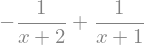

In [46]:
sympy.apart(1/(x**2 + 3*x + 2), x)

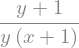

In [47]:
sympy.together(1 / (y * x + y) + 1 / (1+x))

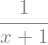

In [48]:
sympy.cancel(y / (y * x + y))

### Substitutions

In [49]:
(x + y).subs(x, y)

In [50]:
sympy.sin(x * sympy.exp(x)).subs(x, y)

In [51]:
sympy.sin(x * z).subs({z: sympy.exp(y), x: y, sympy.sin: sympy.cos})

In [52]:
expr = x * y + z**2 *x
values = {x: 1.25, y: 0.4, z: 3.2}
expr.subs(values)

### Numerical Evaluation

In [53]:
sympy.N(1 + pi)

In [54]:
(x + 1/pi).evalf(10)

In [55]:
expr = sympy.sin(pi * x * sympy.exp(x))
expr_func = sympy.lambdify(x, expr)
expr_func(1.0)

In [56]:
expr_func = sympy.lambdify(x, expr, 'numpy')
import numpy as np
xvalues = np.arange(0, 10)
yvalues = expr_func(xvalues)

array([ 0.        ,  0.77394269,  0.64198244,  0.72163867,  0.94361635,
        0.20523391,  0.97398794,  0.97734066, -0.87034418, -0.69512687])

## Calculus

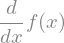

In [57]:
f = sympy.Function('f')(x)
sympy.diff(f, x)
# equivalent to f.diff(x)

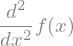

In [58]:
sympy.diff(f, x, x)

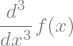

In [59]:
sympy.diff(f, x, 3)

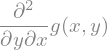

In [60]:
g = sympy.Function('g')(x, y)
g.diff(x, y)

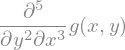

In [61]:
g.diff(x, 3, y, 2)

In [62]:
expr = x**4 + x**3 + x**2 + x + 1
expr.diff(x)

In [63]:
expr.diff(x, x)

In [64]:
expr = (x + 1)**3 * y ** 2 * (z - 1)
expr.diff(x, y, z)

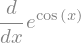

In [65]:
d = sympy.Derivative(sympy.exp(sympy.cos(x)), x)
d

In [66]:
d.doit()

### Integrals

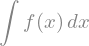

In [67]:
a, b, x, y = sympy.symbols("a, b, x, y")
f = sympy.Function("f")(x)
sympy.integrate(f)

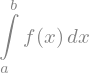

In [68]:
sympy.integrate(f, (x, a, b))

In [69]:
sympy.integrate(sympy.sin(x))

In [70]:
sympy.integrate(sympy.sin(x), (x, a, b))

In [71]:
sympy.integrate(sympy.exp(-x**2), (x, 0, oo))

In [72]:
a, b, c = sympy.symbols("a, b, c", positive=True)
sympy.integrate(a * sympy.exp(-((x-b)/c)**2), (x, -oo, oo))

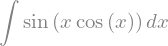

In [73]:
sympy.integrate(sympy.sin(x * sympy.cos(x)))

In [74]:
expr = sympy.sin(x*sympy.exp(y))
sympy.integrate(expr, x)

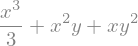

In [75]:
expr = (x + y)**2
sympy.integrate(expr, x)

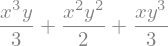

In [76]:
sympy.integrate(expr, x, y)

In [77]:
sympy.integrate(expr, (x, 0, 1), (y, 0, 1))

### Sums and Products

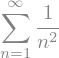

In [78]:
# We omit Series and Limits!
n = sympy.symbols("n", integer=True)
x = sympy.Sum(1/(n**2), (n, 1, oo))
x

In [79]:
x.doit()

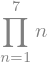

In [80]:
x = sympy.Product(n, (n, 1, 7))
x

In [81]:
x.doit()

## Equations

In [82]:
x = sympy.Symbol("x")
sympy.solve(x**2 + 2*x - 3)

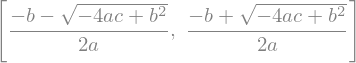

In [83]:
a, b, c = sympy.symbols("a, b, c")
sympy.solve(a * x**2 + b * x + c, x)

In [84]:
sympy.solve(sympy.sin(x) - sympy.cos(x), x)

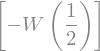

In [85]:
sympy.solve(sympy.exp(x) + 2 * x, x)
# LambertW function

It is not uncommon to encounter equations that are not solvable algebraically or which SymPy is unable to solve. 

In [86]:
sympy.solve(x**5 - x**2 + 1, x)

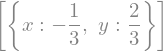

In [87]:
eq1 = x + 2 * y - 1
eq2 = x - y + 1
sympy.solve([eq1, eq2], [x, y], dict=True)

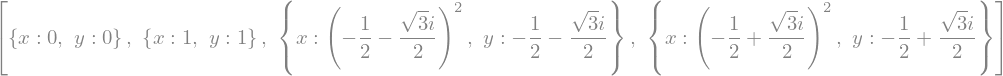

In [88]:
eq1 = x**2 - y
eq2 = y**2 - x
sols = sympy.solve([eq1, eq2], [x, y], dict=True)
sols

### Linear Algebra

In [89]:
sympy.Matrix([1, 2])

In [90]:
sympy.Matrix([[1, 2]])

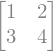

In [91]:
sympy.Matrix([[1, 2], [3, 4]])

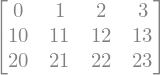

In [92]:
sympy.Matrix(3, 4, lambda m, n: 10 * m + n)

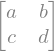

In [93]:
a, b, c, d = sympy.symbols("a, b, c, d")
M = sympy.Matrix([[a, b], [c, d]])
M

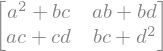

In [94]:
M * M

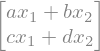

In [95]:
x = sympy.Matrix(sympy.symbols("x_1, x_2"))
M * x

$$
x + py =b_1\\
qx + y =b_2
$$

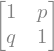

In [96]:
p, q = sympy.symbols("p, q")
M = sympy.Matrix([[1, p], [q, 1]])
M

In [97]:
b = sympy.Matrix(sympy.symbols("b_1, b_2"))
b

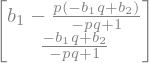

In [98]:
# computing the inverse of a matrix is more difficult
x = M.LUsolve(b)
x 

## Latex

In [10]:
x = sympy.Symbol("x")
# Greek alphabet 
print(sympy.latex(sympy.Integral(sympy.sqrt(1/x), x)))
# use print() !!!

\int \sqrt{\frac{1}{x}}\, dx


$$
\int \sqrt{\frac{1}{x}}\, dx
$$


In [100]:
print(sympy.latex(sympy.Integral(sympy.sqrt(1/x), x).doit())) 

2 x \sqrt{\frac{1}{x}}


$$
2 x \sqrt{\frac{1}{x}}
$$

In [11]:
alpha, beta, gamma= sympy.symbols("alpha_1 beta_2 gamma_3")
alpha, beta, gamma

In [12]:
print(sympy.latex(alpha+beta+gamma))

\alpha_{1} + \beta_{2} + \gamma_{3}
